# Predicting Tourist Spending in Tanzania: A Machine Learning Model

## Problem Statement:
Tourism plays a crucial role in Tanzania's economy, contributing significantly to its GDP and foreign exchange revenues. With its diverse attractions, including the Serengeti, Ngorongoro Crater, and Mount Kilimanjaro, Tanzania draws over a million international visitors annually. However, tourists often lack precise tools to estimate their expenditure before visiting. The objective of this hackathon is to develop a machine learning model that predicts tourist spending in Tanzania. This solution will assist tour operators and the Tanzania Tourism Board in providing more accurate expenditure estimates, enhancing the planning experience for travelers.

### data source
The data was provided by Zindi Africa.

In [ ]:
#importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv("/content/Train (1).csv")
test = pd.read_csv("/content/Test (1).csv")
sub = pd.read_csv("/content/SampleSubmission (1).csv")

In [ ]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [ ]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [ ]:
sub.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


### Data Cleaning
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset

In [ ]:
train.shape, test.shape, sub.shape

((4809, 23), (1601, 22), (1601, 2))

In [ ]:
train.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

- The data is mostly comprised of categorical features and a few numerical features.
- we have some missing values in some features and we will handle them later.

In [ ]:
Threshold = train.isnull().sum() / train.shape[0] * 100
Threshold


,0
ID,0.000000
country,0.000000
age_group,0.000000
travel_with,23.164899
total_female,0.062383
total_male,0.103972
purpose,0.000000
main_activity,0.000000
info_source,0.000000
tour_arrangement,0.000000


We are going to drop the rows with less the 5% missing values and impute the ones with more than 5%

In [ ]:
Threshold2 = test.isnull().sum() / test.shape[0] * 100
Threshold2

,0
ID,0.000000
country,0.000000
age_group,0.000000
travel_with,20.424735
total_female,0.062461
total_male,0.124922
purpose,0.000000
main_activity,0.000000
info_source,0.000000
tour_arrangement,0.000000


In [ ]:
train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [ ]:
train.describe(include='object').T

,count,unique,top,freq
ID,4809,4809,tour_0,1
country,4809,105,UNITED STATES OF AMERICA,695
age_group,4809,4,25-44,2487
travel_with,3695,5,Alone,1265
purpose,4809,7,Leisure and Holidays,2840
main_activity,4809,9,Wildlife tourism,2259
info_source,4809,8,"Travel, agent, tour operator",1913
tour_arrangement,4809,2,Independent,2570
package_transport_int,4809,2,No,3357
package_accomodation,4809,2,No,2602


In [ ]:
train.apply(lambda x: len(x.unique()))

,0
ID,4809
country,105
age_group,4
travel_with,6
total_female,15
total_male,15
purpose,7
main_activity,9
info_source,8
tour_arrangement,2


## EXPLORATORY DATA ANALYSIS


In [ ]:
# Getting all different types of features
num_features = [feature for feature in train.columns if train[feature].dtype != 'O']
print(f'Numerical Features:', num_features)

cat_features = [feature for feature in train.columns if train[feature].dtype == 'O']
print(f'Categorical Features:', cat_features)

discrete_features = [feature for feature in num_features if len(train[feature].unique()) <= 25]
print(f'Discrete Features:', discrete_features)

continuous_features = [feature for feature in num_features if feature not in discrete_features]
print(f'Continuous Features:', continuous_features)



Numerical Features: ['total_female', 'total_male', 'night_mainland', 'night_zanzibar', 'total_cost']
Categorical Features: ['ID', 'country', 'age_group', 'travel_with', 'purpose', 'main_activity', 'info_source', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz', 'most_impressing']
Discrete Features: ['total_female', 'total_male']
Continuous Features: ['night_mainland', 'night_zanzibar', 'total_cost']


## Numerical Columnns


### Total female

In [ ]:
train['total_female'].value_counts()

,count
total_female,
1.0,2418
0.0,1669
2.0,463
3.0,144
4.0,46
5.0,25
6.0,15
7.0,10
10.0,4


Text(0.5, 0, 'total_female')

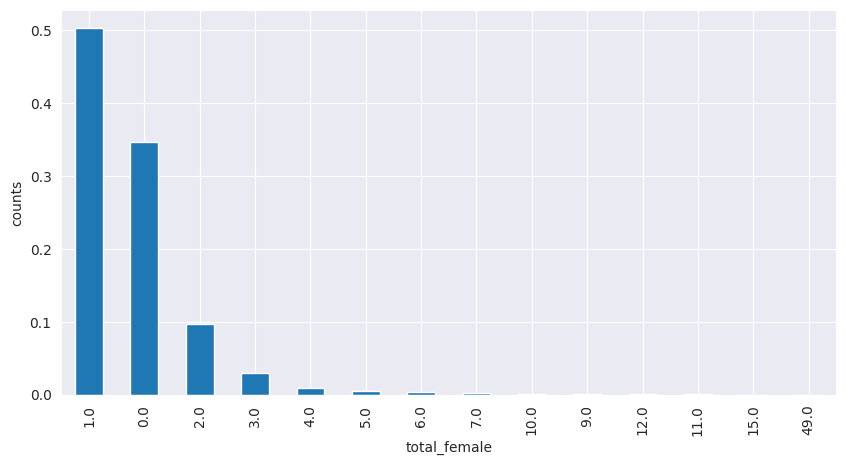

In [ ]:

plt.figure(figsize=(10,5))
train['total_female'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('total_female')

- Remember that this column had a few missing values so we are going to impute them with the median value since it is also skewed.

In [ ]:
median = train.total_female.median()
median

1.0

In [ ]:
# impute missing values in total female in train and test set

for df in [train, test]:
    df['total_female'].fillna(median, inplace=True)

### Total male

In [ ]:
train['total_male'].value_counts()

,count
total_male,
1.0,2961
0.0,1137
2.0,478
3.0,139
4.0,46
6.0,17
5.0,15
15.0,2
7.0,2


Text(0.5, 0, 'total_male')

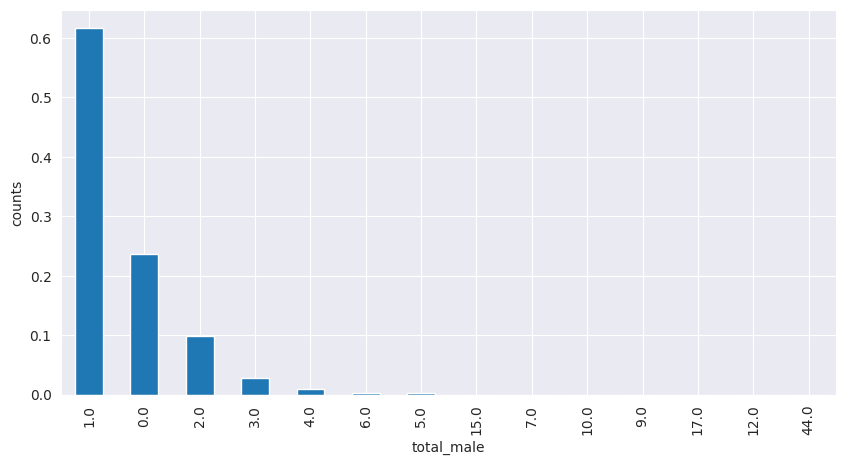

In [ ]:
plt.figure(figsize=(10,5))
train['total_male'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('total_male')

In [ ]:
train['total_male'].isnull().sum()

5

In [ ]:
median2 = train.total_male.median()
median2

1.0

In [ ]:
#imputing the missing values
for df in [train, test]:
    df['total_male'].fillna(median2, inplace=True)

In [ ]:
train['total_people'] = train['total_female'] + train['total_male']
test['total_people'] = test['total_female'] + test['total_male']

Text(0.5, 0, 'total_people')

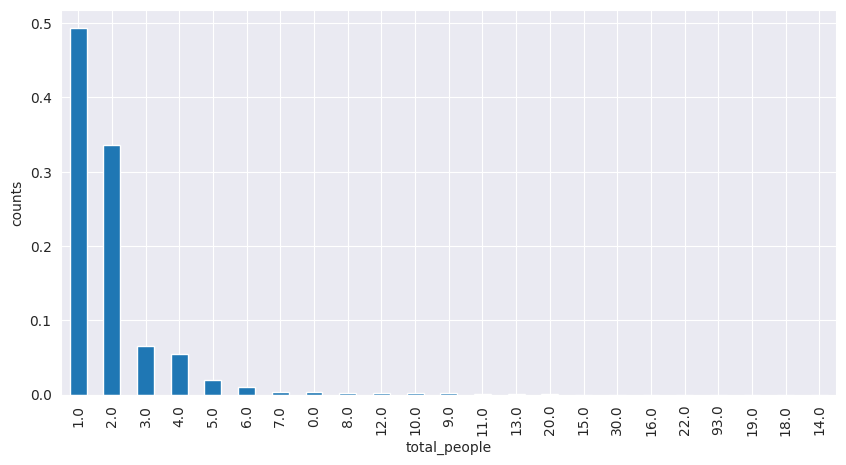

In [ ]:
plt.figure(figsize=(10,5))
train['total_people'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('total_people')

<Axes: xlabel='total_people'>

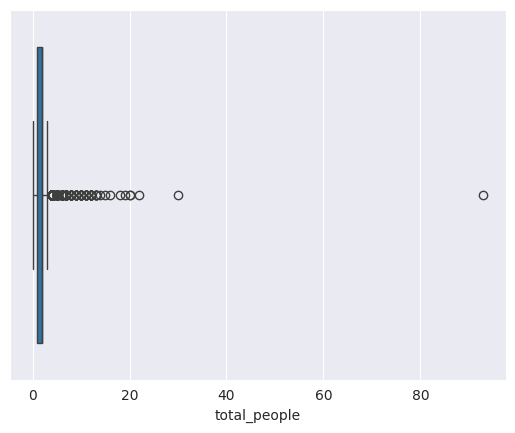

In [ ]:
sns.boxplot(data=train, x='total_people')

### Night mainland

Text(0.5, 0, 'night_mainland')

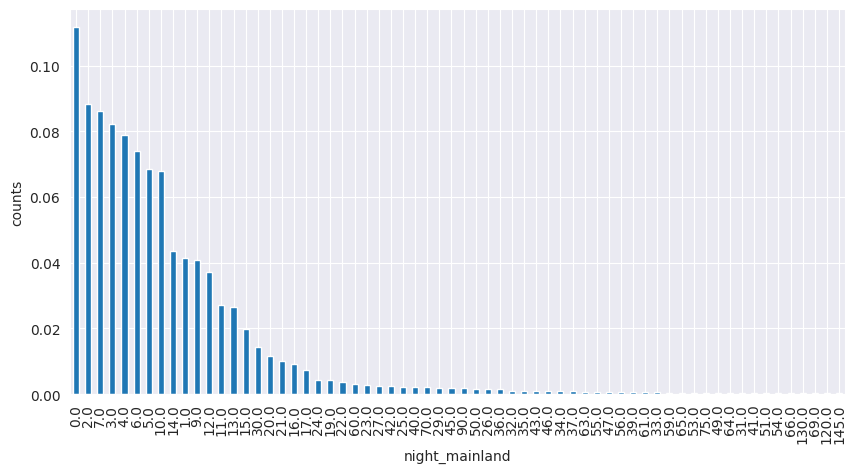

In [ ]:
plt.figure(figsize=(10,5))
train['night_mainland'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('night_mainland')

### Night zanzibar

In [ ]:
train['night_zanzibar'].value_counts()

,count
night_zanzibar,
0.0,3023
7.0,367
4.0,282
3.0,261
5.0,229
6.0,184
2.0,128
10.0,62
14.0,50


Text(0.5, 0, 'night_zanzibar')

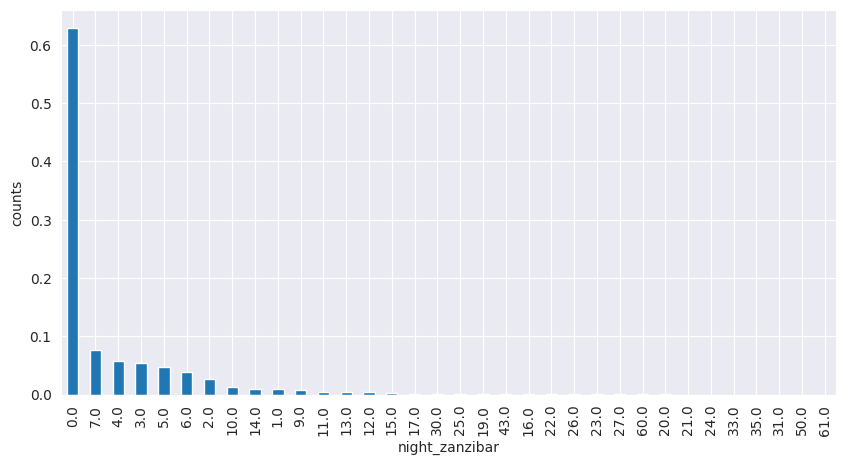

In [ ]:
plt.figure(figsize=(10,5))
train['night_zanzibar'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('night_zanzibar')

In [ ]:
train['total_nights'] = train['night_mainland'] + train['night_zanzibar']
test['total_nights'] = test['night_mainland'] + test['night_zanzibar']

Text(0.5, 0, 'total_nights')

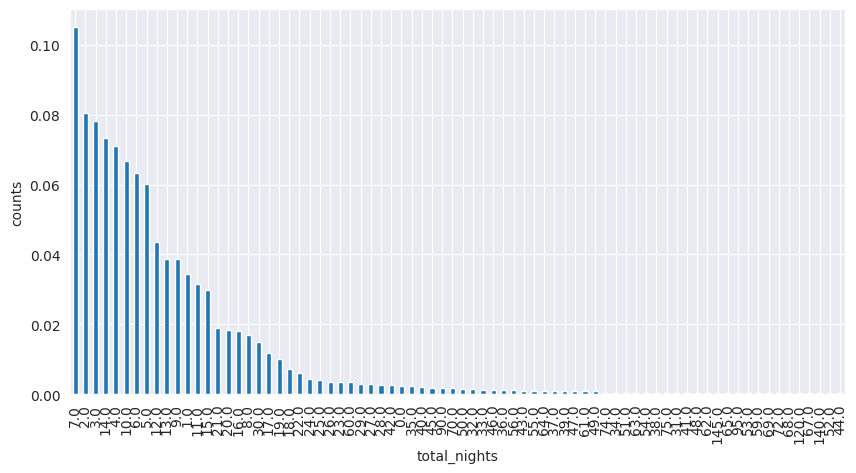

In [ ]:
plt.figure(figsize=(10,5))
train['total_nights'].value_counts(normalize=True).plot(kind='bar')
plt.ylabel('counts')
plt.xlabel('total_nights')

We can see that the data for the four features is skewed with most of the leaning on oneside.We will fix that by capping some values using  the 95 percentile as reference.

In [ ]:
skewed = ['total_male','total_female','night_mainland','night_zanzibar','total_people','total_nights']
train[skewed].describe(percentiles=[0.05,0.95])

,total_male,total_female,night_mainland,night_zanzibar,total_people,total_nights
count,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000,4809.000000
mean,1.009565,0.926804,8.488043,2.304429,1.936369,10.792472
std,1.138273,1.287841,10.427624,4.227080,2.079260,10.779025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,1.000000,1.000000,6.000000,0.000000,2.000000,8.000000
95%,2.000000,3.000000,26.000000,10.000000,4.000000,30.000000
max,44.000000,49.000000,145.000000,61.000000,93.000000,145.000000


In [ ]:
train['total_male'].loc[train['total_male'] > 2.000000]  = 3.000000
train['total_female'].loc[train['total_female'] > 3.000000]  = 4.000000
train['night_mainland'].loc[train['night_mainland'] > 26.000000]  = 28.000000
train['night_zanzibar'].loc[train['night_zanzibar'] > 10.000000]  = 11.000000
train['total_people'].loc[train['total_people'] > 4.000000]  =   5.000000
train['total_nights'].loc[train['total_nights'] > 30.000000] = 33.000000

In [ ]:
test['total_male'].loc[test['total_male'] > 2.000000]  = 3.000000
test['total_female'].loc[test['total_female'] > 3.000000]  = 4.000000
test['night_mainland'].loc[test['night_mainland'] > 26.000000]  = 28.000000
test['night_zanzibar'].loc[test['night_zanzibar'] > 10.000000]  = 11.000000
test['total_people'].loc[test['total_people'] > 4.000000]  =   5.000000
test['total_nights'].loc[test['total_nights'] > 30.000000] = 33.000000

## Categorical columns  

### Country

In [ ]:
train['country'].value_counts()

,count
country,
UNITED STATES OF AMERICA,695
UNITED KINGDOM,533
ITALY,393
FRANCE,280
ZIMBABWE,274
...,...
NIGER,1
MYANMAR,1
DOMINICA,1


- We are going to group the countries into regions.

In [ ]:
# Define the country groups with capital letters
country_groups = {
    'America': [
        'UNITED STATES OF AMERICA', 'CANADA', 'MEXICO', 'BRAZIL', 'ARGENTINA', 'CHILE', 'COLOMBIA', 'PERU',
        'VENEZUELA', 'ECUADOR', 'URUGUAY', 'PARAGUAY', 'BOLIVIA', 'CUBA', 'PANAMA', 'COSTA RICA',
        'GUATEMALA', 'EL SALVADOR', 'HONDURAS','COSTARICA', 'PHILIPINES', 'NICARAGUA','TRINIDAD TOBACCO', 'JAMAICA', 'HAITI', 'DOMINICAN REPUBLIC',
        'TRINIDAD AND TOBAGO', 'BARBADOS', 'BAHAMAS', 'GUYANA', 'SURINAME','DOMINICA', 'BELIZE', 'ST. LUCIA',
        'GRENADA', 'ST. VINCENT AND THE GRENADINES'
    ],
    'Africa': [
        'TANZANIA', 'KENYA', 'SOUTH AFRICA','DRC', 'NIGERIA','MALAWI', 'EGYPT', 'UGANDA', 'RWANDA', 'ZAMBIA',
        'ZIMBABWE', 'NAMIBIA', 'ETHIOPIA','SWAZILAND', 'GHANA', 'BOTSWANA', 'MOROCCO', 'ALGERIA', 'SENEGAL',
        'IVORY COAST', 'ANGOLA', 'MOZAMBIQUE', 'TUNISIA', 'MALI', 'MADAGASCAR', 'BURUNDI', 'BENIN',
        'CAMEROON', 'CAPE VERDE', 'CENTRAL AFRICAN REPUBLIC', 'CHAD', 'COMOROS', 'CONGO',
        'DEMOCRATIC REPUBLIC OF THE CONGO','SOMALI', 'DJIBOUTI','DJIBOUT', 'MORROCO', 'ERITREA', 'ESWATINI', 'GABON', 'GAMBIA',
        'GUINEA', 'GUINEA-BISSAU', 'LESOTHO', 'LIBERIA', 'LIBYA', 'MAURITANIA', 'MAURITIUS', 'MOROCCO',
        'NIGER', 'SÃO TOMÉ AND PRÍNCIPE', 'SEYCHELLES', 'SIERRA LEONE', 'SOMALIA', 'SOUTH SUDAN', 'SUDAN',
        'TOGO'
    ],
    'Europe': [
        'UNITED KINGDOM','SWIZERLAND','BURGARIA', 'GERMANY', 'FRANCE', 'ITALY', 'SPAIN', 'NETHERLANDS', 'SWEDEN', 'NORWAY',
        'DENMARK', 'SWITZERLAND', 'BELGIUM', 'AUSTRIA', 'IRELAND', 'POLAND', 'FINLAND', 'PORTUGAL',
        'GREECE', 'HUNGARY', 'CZECH REPUBLIC','MACEDONIA', 'ROMANIA', 'BULGARIA', 'CROATIA', 'SLOVAKIA', 'SERBIA',
        'LITHUANIA', 'LATVIA', 'ESTONIA', 'SLOVENIA','BOSNIA', 'BOSNIA AND HERZEGOVINA', 'MONTENEGRO',
        'ALBANIA', 'ICELAND', 'LIECHTENSTEIN', 'MONACO', 'MOLDOVA', 'MALTA','UKRAIN', 'SCOTLAND', 'RUSSIA', 'TURKEY', 'CYPRUS', 'LUXEMBOURG'
    ],
    'Asia': [
        'CHINA', 'JAPAN', 'INDIA', 'SOUTH KOREA','UAE', 'THAILAND','KOREA', 'INDONESIA', 'MALAYSIA', 'SINGAPORE',
        'VIETNAM', 'PHILIPPINES', 'BANGLADESH', 'PAKISTAN', 'NEPAL','KUWAIT', 'SRI LANKA', 'MYANMAR', 'CAMBODIA',
        'LAOS', 'MALDIVES', 'MONGOLIA', 'UZBEKISTAN','SAUD ARABIA', 'KAZAKHSTAN', 'TAIWAN', 'IRAN', 'IRAQ', 'ISRAEL',
        'SAUDI ARABIA', 'UNITED ARAB EMIRATES', 'JORDAN', 'LEBANON', 'QATAR', 'OMAN', 'YEMEN', 'SYRIA',
        'AFGHANISTAN', 'TURKMENISTAN', 'KYRGYZSTAN', 'GEORGIA', 'ARMENIA', 'AZERBAIJAN'
    ]
}

# Function to categorize countries into regions
def categorize_country(country):
    for group, countries in country_groups.items():
        if country in countries:
            return group
    return 'Rest of the World'  # If not found in any group, assign 'Rest of the World'

# Apply the function to group countries
train['country_group'] = train['country'].apply(categorize_country)
test['country_group'] = test['country'].apply(categorize_country)




In [ ]:
train['country_group'].value_counts()

,count
country_group,
Europe,2064
Africa,1314
America,833
Asia,389
Rest of the World,209


In [ ]:
#checking which countries are in the rest of the world
train[train['country_group'] == 'Rest of the World']['country'].unique()

array(['MALT', 'AUSTRALIA', 'NEW ZEALAND', 'COMORO', 'BERMUDA'],
      dtype=object)

In [ ]:
test[test['country_group'] == 'Rest of the World']['country'].unique()

array(['AUSTRALIA', 'NEW ZEALAND', 'COMORO', 'MALT'], dtype=object)

Text(0, 0.5, 'Count')

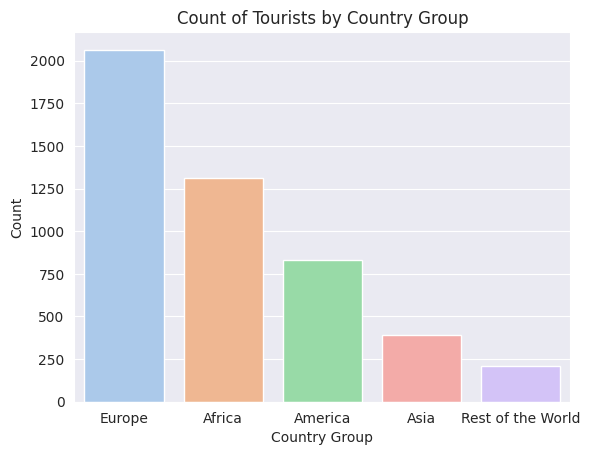

In [ ]:
sns.countplot(data=train, x='country_group', palette='pastel', order=train['country_group'].value_counts().index)

# Add labels and title
plt.title('Count of Tourists by Country Group')
plt.xlabel('Country Group')
plt.ylabel('Count')

- Most visitors are from Europe followed by Africa.

### Age group

In [ ]:
train['age_group'].value_counts()

,count
age_group,
25-44,2487
45-64,1391
1-24,624
65+,307


In [ ]:
test['age_group'].value_counts()

,count
age_group,
25-44,866
45-64,447
24-Jan,202
65+,86


We can see that there was some naming error there in the 1-24 and 24-Jan for train and test

In [ ]:
# Correct the category name in the 'age_group' column of the test dataset
test['age_group'] = test['age_group'].replace('24-Jan', '1-24')

# Verify the changes
print(test['age_group'].value_counts())


age_group
25-44    866
45-64    447
1-24     202
65+       86
Name: count, dtype: int64


Text(0, 0.5, 'Count')

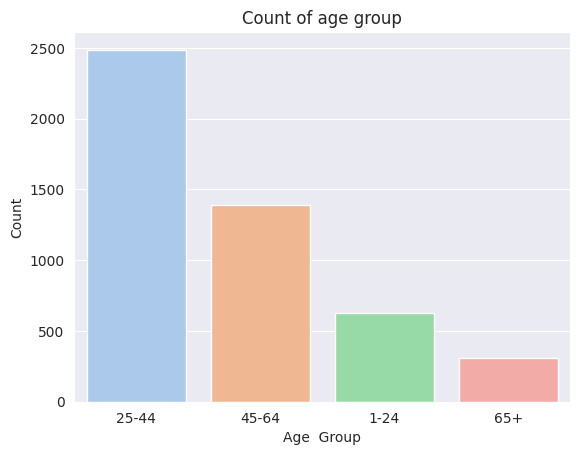

In [ ]:
sns.countplot(data=train, x='age_group', palette='pastel', order=train['age_group'].value_counts().index)

# Add labels and title
plt.title('Count of age group')
plt.xlabel('Age  Group')
plt.ylabel('Count')

- Most visitors are middle aged people followed by the age bracket of 45-64

Travel companion

In [ ]:
print(train[['travel_with']].head())
print(train[['travel_with']].shape)


         travel_with
0  Friends/Relatives
1                NaN
2              Alone
3             Spouse
4                NaN
(4809, 1)


In [ ]:
print(train['travel_with'].dtypes)
print(train['travel_with'].isnull().sum())


object
1114


In [ ]:
train['travel_with'].value_counts()

,count
travel_with,
Alone,1265
Spouse,1005
Friends/Relatives,895
Spouse and Children,368
Children,162


In [ ]:
## handling missing values
mode_value = train['travel_with'].mode()[0]  # Get the most frequent value
print("Mode of 'travel_with':", mode_value)





Mode of 'travel_with': Alone


In [ ]:
train['travel_with'] = train['travel_with'].fillna(mode_value)
test['travel_with'] = test['travel_with'].fillna(mode_value)


In [ ]:
train['travel_with'].unique()

array(['Friends/Relatives', 'Alone', 'Spouse', 'Children',
       'Spouse and Children'], dtype=object)

Text(0, 0.5, 'Count')

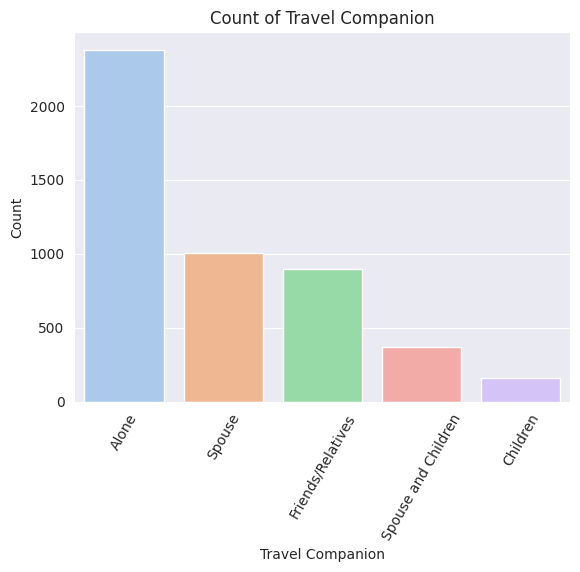

In [ ]:
sns.countplot(data=train, x='travel_with', palette='pastel', order=train['travel_with'].value_counts().index)

# Add labels and title
plt.title('Count of Travel Companion')
plt.xlabel('Travel Companion')
plt.xticks(rotation=60)
plt.ylabel('Count')

- Most people prefer travelling alone followed byb couples or married people.

In [ ]:
## trying to map the values
relationship_mapping = {
    'Alone': 1,
    'Spouse': 2,
    'Friends/Relatives': 3,
    'Spouse and Children': 4,
    'Children': 4
}

train['travel_with'] = train['travel_with'].map(relationship_mapping)
test['travel_with'] = test['travel_with'].map(relationship_mapping)

### Purpose

In [ ]:
train['purpose'].value_counts()

,count
purpose,
Leisure and Holidays,2840
Business,671
Visiting Friends and Relatives,633
Meetings and Conference,312
Volunteering,138
Other,128
Scientific and Academic,87


Text(0, 0.5, 'Count')

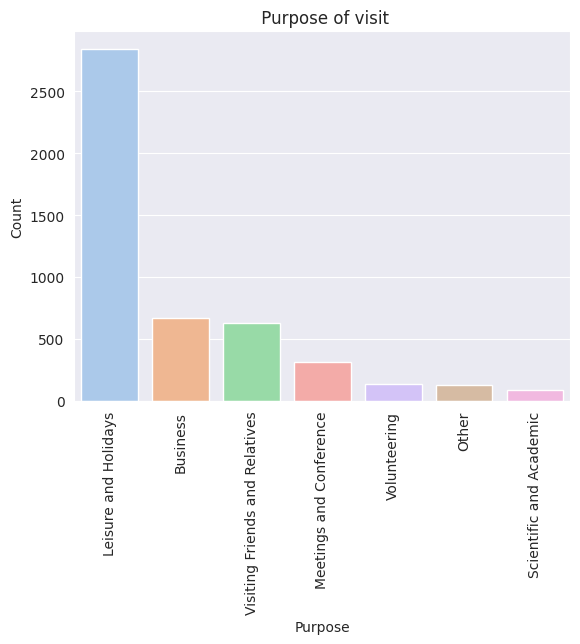

In [ ]:
sns.countplot(data=train, x='purpose', palette='pastel', order=train['purpose'].value_counts().index)

# Add labels and title
plt.title(' Purpose of visit')
plt.xlabel('Purpose')
plt.xticks(rotation=90)
plt.ylabel('Count')

- Most people come for mostly leisure and holidays as expected with others for business.

### Main activity

In [ ]:
train['main_activity'].value_counts()

,count
main_activity,
Wildlife tourism,2259
Beach tourism,1025
Hunting tourism,457
Conference tourism,367
Cultural tourism,359
Mountain climbing,234
business,58
Bird watching,37
Diving and Sport Fishing,13


Text(0, 0.5, 'Count')

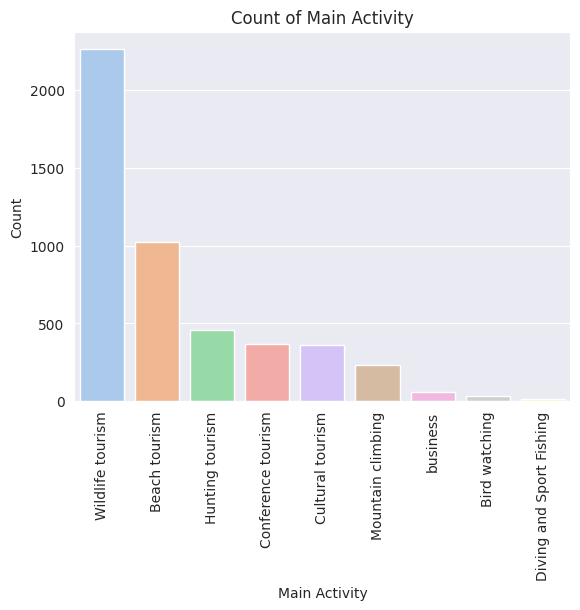

In [ ]:
sns.countplot(data=train, x='main_activity', palette='pastel', order=train['main_activity'].value_counts().index)

# Add labels and title
plt.title('Count of Main Activity')
plt.xlabel('Main Activity')
plt.xticks(rotation=90)
plt.ylabel('Count')

- Tanzania is known for its wildlife eg Serengeti Game reserve and also a nice beach coastal beach in Zanzibar and Dar Er salam hence a good number in the main activities.


In [ ]:
print(train['main_activity'].unique())


['Wildlife tourism' 'Cultural tourism' 'Mountain climbing' 'Beach tourism'
 'Conference tourism' 'Hunting tourism' 'Bird watching' 'business'
 'Diving and Sport Fishing']


In [ ]:
#mapping and grouping some values
activity = {
    'Wildlife tourism': 1,
    'Beach tourism': 2,
    'Hunting tourism': 3,
    'Cultural tourism': 4,
    'Conference tourism': 5,
    'Mountain climbing': 6,
    'business': 6,
    'Bird watching': 6,
    'Diving and Sport Fishing': 6

}
train['main_activity'] = train['main_activity'].map(activity)
test['main_activity'] = test['main_activity'].map(activity)


In [ ]:
train['main_activity'].value_counts()

,count
main_activity,
1,2259
2,1025
3,457
5,367
4,359
6,342


### Information Source

In [ ]:
train['info_source'].value_counts()

,count
info_source,
"Travel, agent, tour operator",1913
"Friends, relatives",1635
others,490
"Newspaper, magazines,brochures",359
"Radio, TV, Web",249
Trade fair,77
Tanzania Mission Abroad,68
inflight magazines,18


Text(0, 0.5, 'Count')

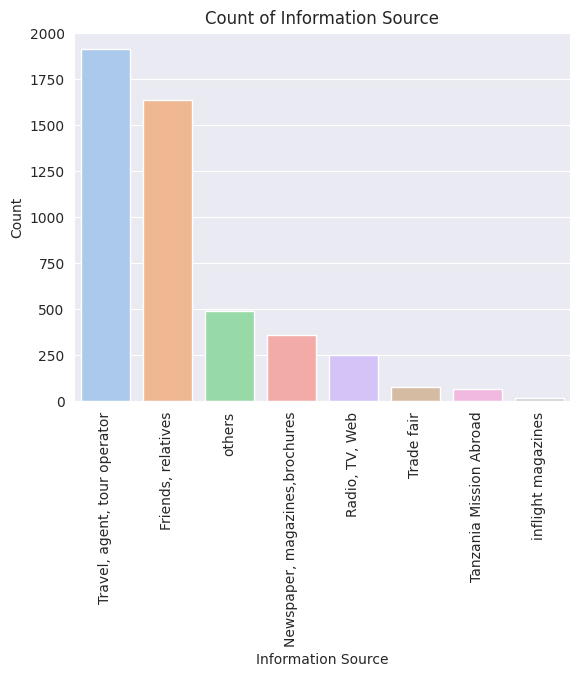

In [ ]:
sns.countplot(data=train, x='info_source', palette='pastel', order=train['info_source'].value_counts().index)

# Add labels and title
plt.title('Count of Information Source')
plt.xlabel('Information Source')
plt.xticks(rotation=90)
plt.ylabel('Count')

In [ ]:

#mapping and grouping some values
source = {
    'Travel, agent, tour operator': 1,
    'Beach tourism': 2,
    'Friends, relatives': 3,
    'others': 4,
    'Newspaper, magazines,brochures': 5,
    'Radio, TV, Web': 6,
    'Trade fair': 6,
    'Tanzania Mission Abroad': 6,
    'inflight magazines': 6

}

train['info_source'] = train['info_source'].map(source)
test['info_source'] = test['info_source'].map(source)

In [ ]:
train['info_source'].value_counts()

,count
info_source,
1,1913
3,1635
4,490
6,412
5,359


- Travel agency and friends and relatives are the most common information sources.


### Tour_arrangement

In [ ]:
train['tour_arrangement'].value_counts()

,count
tour_arrangement,
Independent,2570
Package Tour,2239


Text(0, 0.5, 'Count')

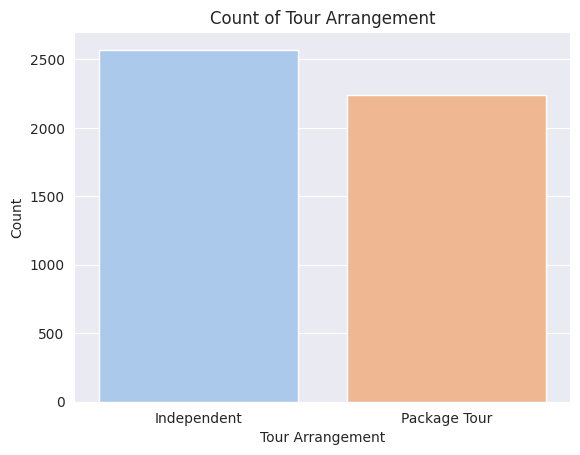

In [ ]:
sns.countplot(data=train, x='tour_arrangement', palette='pastel', order=train['tour_arrangement'].value_counts().index)

# Add labels and title
plt.title('Count of Tour Arrangement')
plt.xlabel('Tour Arrangement')
plt.ylabel('Count')

- Little difference in the tour arrangement

### Package included

In [ ]:

Packages = train[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance']]
Packages



,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
0,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No
3,No,Yes,Yes,Yes,Yes,Yes,No
4,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...
4804,No,No,No,No,No,No,No
4805,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4806,No,No,No,No,No,No,No
4807,Yes,Yes,Yes,No,No,No,No


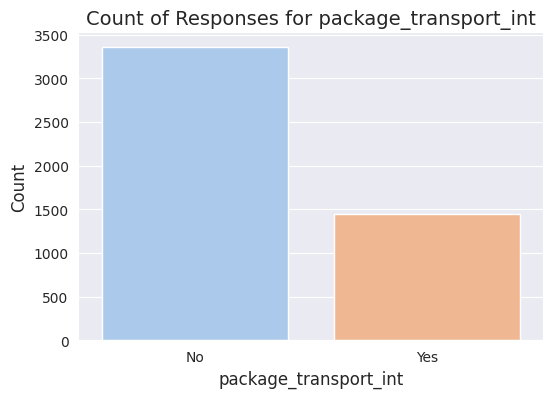

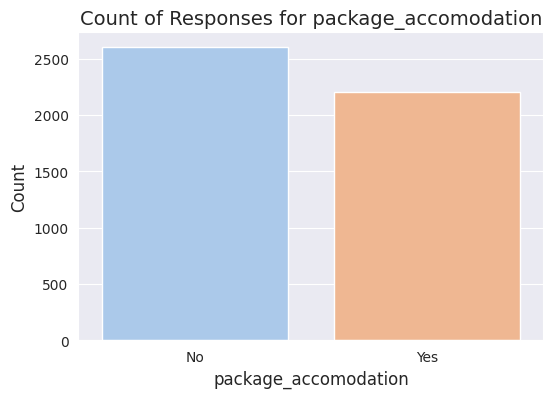

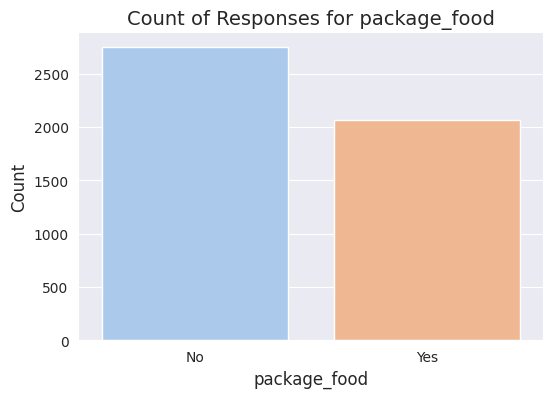

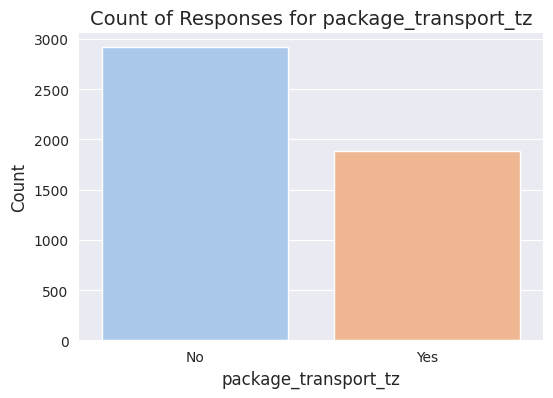

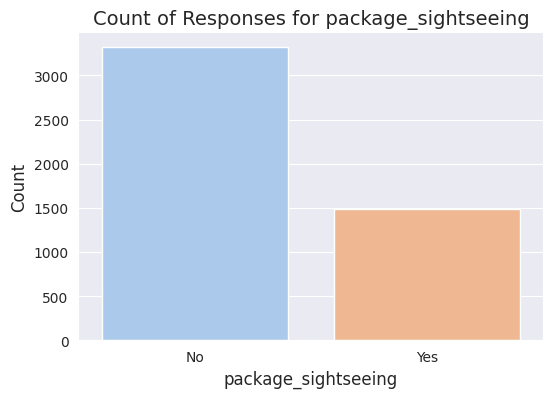

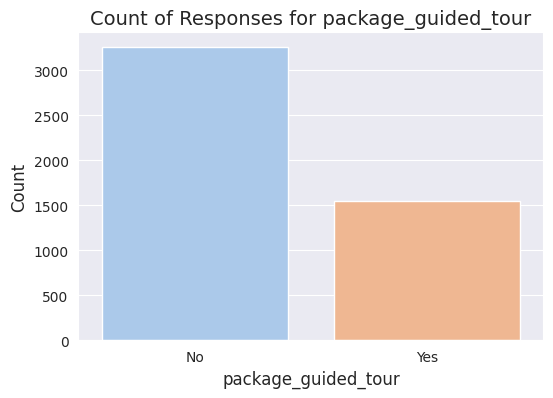

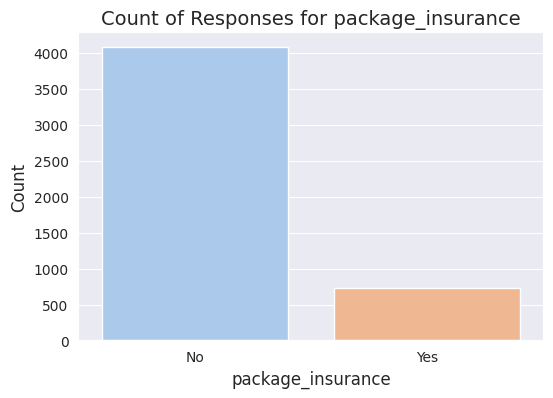

In [ ]:
for column in Packages.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=Packages, x=column, palette='pastel')

    # Add title and labels
    plt.title(f'Count of Responses for {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Display the plot
    plt.show()

- On average most people prefered not having a package during their visit.

In [ ]:
train['package_all'] = train['package_transport_int'].astype(str) + train['package_accomodation'].astype(str) + train['package_food'].astype(str) + train['package_transport_tz'].astype(str)+ train['package_sightseeing'].astype(str)+ train['package_insurance'].astype(str)+train['package_guided_tour'].astype(str)
test['package_all'] = test['package_transport_int'].astype(str) + test['package_accomodation'].astype(str) + test['package_food'].astype(str) + test['package_transport_tz'].astype(str)+ test['package_sightseeing'].astype(str)+ test['package_insurance'].astype(str)+test['package_guided_tour'].astype(str)


### Payment_mode

In [ ]:
train['payment_mode'].value_counts()

,count
payment_mode,
Cash,4172
Credit Card,622
Other,8
Travellers Cheque,7


Text(0, 0.5, 'Count')

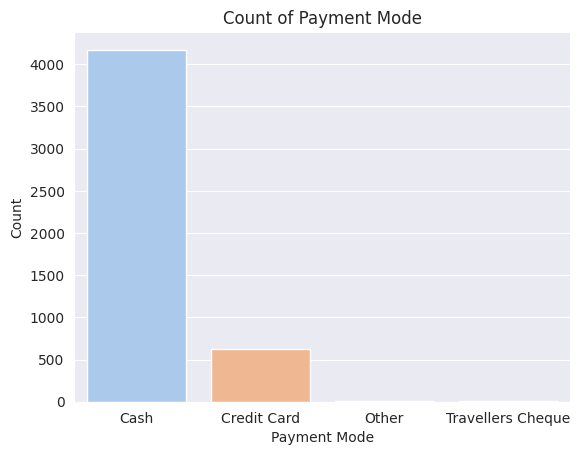

In [ ]:
sns.countplot(data=train, x='payment_mode', palette='pastel', order=train['payment_mode'].value_counts().index)

# Add labels and title
plt.title('Count of Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Count')


In [ ]:
payment = {
    'Cash': 1,
    'Credit Card': 2,
    'Other': 2,
    'Travellers Cheque': 2
}

train['payment_mode'] = train['payment_mode'].map(payment)
test['payment_mode'] = test['payment_mode'].map(payment)

- Most people prefer to pay through cash

### first_trip_tz

In [ ]:
train['first_trip_tz'].value_counts()

,count
first_trip_tz,
Yes,3243
No,1566


Text(0, 0.5, 'Count')

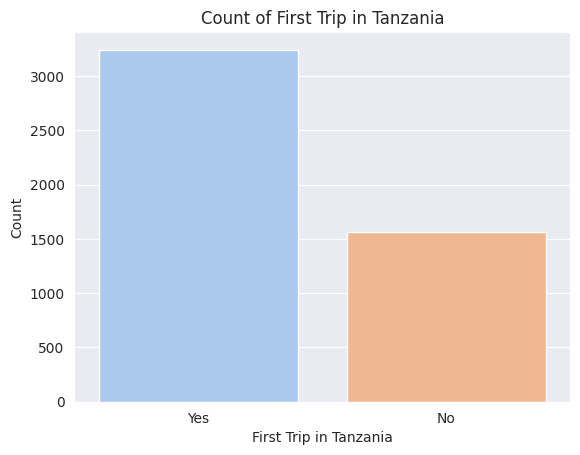

In [ ]:
sns.countplot(data=train, x='first_trip_tz', palette='pastel', order=train['first_trip_tz'].value_counts().index)

# Add labels and title
plt.title('Count of First Trip in Tanzania')
plt.xlabel('First Trip in Tanzania')
plt.ylabel('Count')

- A huge number visited Tanzania for the first time.

### most_impressing

In [ ]:
train['most_impressing'].value_counts()

,count
most_impressing,
Friendly People,1541
Wildlife,1038
No comments,743
"Wonderful Country, Landscape, Nature",507
Good service,365
Excellent Experience,271
Satisfies and Hope Come Back,31


In [ ]:
#handling the missing values
mode_value2 = train['most_impressing'].mode()[0]  # Get the most frequent value
print("Mode of 'most_impressing':", mode_value2)

Mode of 'most_impressing': Friendly People


In [ ]:
train['most_impressing'] = train['most_impressing'].fillna(mode_value2)
test['most_impressing'] = test['most_impressing'].fillna(mode_value2)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friendly People'),
  Text(1, 0, ' Wildlife'),
  Text(2, 0, 'No comments'),
  Text(3, 0, 'Wonderful Country, Landscape, Nature'),
  Text(4, 0, 'Good service'),
  Text(5, 0, 'Excellent Experience'),
  Text(6, 0, 'Satisfies and Hope Come Back')])

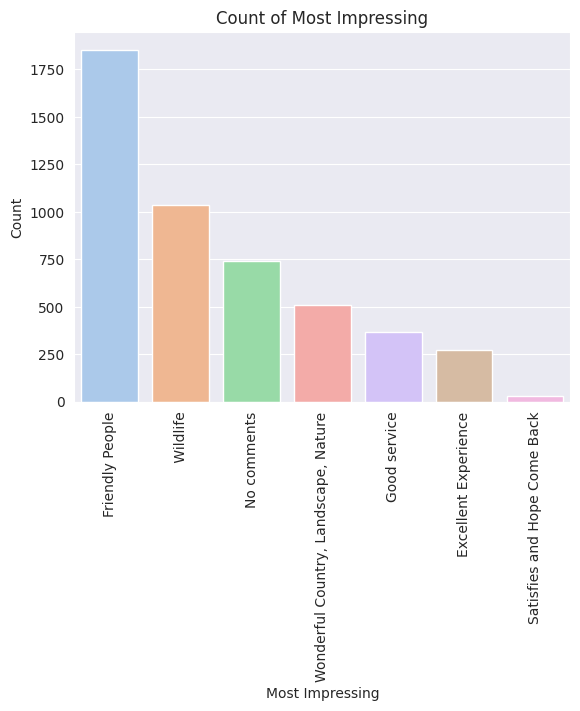

In [ ]:
sns.countplot(data=train, x='most_impressing', palette='pastel', order=train['most_impressing'].value_counts().index)

# Add labels and title
plt.title('Count of Most Impressing')
plt.xlabel('Most Impressing')
plt.ylabel('Count')
plt.xticks(rotation=90)

In [ ]:
print(train['most_impressing'].unique())

['Friendly People' 'Wonderful Country, Landscape, Nature'
 'Excellent Experience' 'No comments' ' Wildlife' 'Good service'
 'Satisfies and Hope Come Back']


In [ ]:
impressing = {
   'Friendly People':1,
   ' Wildlife':2,
   'No comments':3,
   'Wonderful Country, Landscape, Nature':4,
   'Good service':5,
   'Excellent Experience':5,
   'Satisfies and Hope Come Back':5

   }

train['most_impressing'] = train['most_impressing'].map(impressing)
test['most_impressing'] = test['most_impressing'].map(impressing)

## Feature interaction and Encoding.
- Feature interaction refers to the creation of new features by combining existing ones in a way that captures their joint effect on the target variable.

In [ ]:
#CONCATENATING BOTH THE TEST AND TRAIN FOR EASY DATA MANIPULATON
ntrain = train.shape[0]
ntest = test.shape[0]
data = pd.concat((train, test)).reset_index(drop=True)

In [ ]:
data['diff_nights'] = data['night_mainland'] - data['night_zanzibar']
data['diff_male_female'] = data['total_female'] - data["total_male"]
data['prod_nights_people'] = data['total_nights']*data['total_people']
data['sum_nights_people'] = data['total_nights']+data['total_people']

In [ ]:
data['tour_total_people'] = data['tour_arrangement'] + data['total_people'].astype('str')
data['tour_total_nights'] = data['tour_arrangement'] + data['total_people'].astype('str')
data['tour_package_all'] = data['tour_arrangement'] + data['package_all']
data['activity_touur'] = data['tour_arrangement']+data['main_activity'].astype(str)

### Encoding

In [ ]:
data.apply(lambda x: len(x.unique()))

,0
ID,6410
country,118
age_group,4
travel_with,4
total_female,5
total_male,4
purpose,7
main_activity,6
info_source,5
tour_arrangement,2


In [ ]:
# Separate train and test data from the combined dataframe
train = data[:ntrain]
test = data[ntrain:]

# Check the shapes of the split dataset
train.shape, test.shape

((4809, 35), (1601, 35))

In [ ]:
test.drop('total_cost', axis=1, inplace=True)

In [ ]:
# Getting all different types of features
num_feat = [feature for feature in data.columns if data[feature].dtype != 'O']
print(f'New Numerical Features:', num_feat)

cat_feat = [feature for feature in data.columns if data[feature].dtype == 'O']
print(f'New Categorical Features:', cat_feat)

discrete_features = [feature for feature in num_feat if len(data[feature].unique()) <= 25]
print(f'New Discrete Features:', discrete_features)

continuous_features = [feature for feature in num_feat if feature not in discrete_features]
print(f'New Continuous Features:', continuous_features)

New Numerical Features: ['travel_with', 'total_female', 'total_male', 'main_activity', 'info_source', 'night_mainland', 'night_zanzibar', 'payment_mode', 'most_impressing', 'total_cost', 'total_people', 'total_nights', 'diff_nights', 'diff_male_female', 'prod_nights_people', 'sum_nights_people']
New Categorical Features: ['ID', 'country', 'age_group', 'purpose', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'first_trip_tz', 'country_group', 'package_all', 'tour_total_people', 'tour_total_nights', 'tour_package_all', 'activity_touur']
New Discrete Features: ['travel_with', 'total_female', 'total_male', 'main_activity', 'info_source', 'night_zanzibar', 'payment_mode', 'most_impressing', 'total_people', 'diff_male_female']
New Continuous Features: ['night_mainland', 'total_cost', 'total_nights', 'diff_nights', 'prod_nights_people', 'sum_nights_people']


### group encoding

In [ ]:
col = ['age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'most_impressing', 'night_zanzibar', 'total_people',
       'country_group', 'diff_male_female', 'tour_total_people', 'tour_total_nights','activity_touur','purpose']

for feature in col:
    # Count encoding for each column and store it as a new column with '_count' suffix
    train[f'{feature}_count'] = train[feature].map(train[feature].value_counts())
    test[f'{feature}_count'] = test[feature].map(train[feature].value_counts())




In [ ]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,main_activity_count,info_source_count,most_impressing_count,night_zanzibar_count,total_people_count,country_group_count,diff_male_female_count,tour_total_people_count,tour_total_nights_count,activity_touur_count
0,tour_0,SWIZERLAND,45-64,3,1.0,1.0,Leisure and Holidays,1,3,Independent,...,2259,1635,1854,3023,1619,2064,1475,613,613,943
1,tour_10,UNITED KINGDOM,25-44,1,1.0,0.0,Leisure and Holidays,4,4,Independent,...,359,490,507,367,2373,2064,1143,1657,1657,266
2,tour_1000,UNITED KINGDOM,25-44,1,0.0,1.0,Visiting Friends and Relatives,4,3,Independent,...,359,1635,667,186,2373,2064,1611,1657,1657,266
3,tour_1002,UNITED KINGDOM,25-44,2,1.0,1.0,Leisure and Holidays,1,1,Package Tour,...,2259,1913,1854,3023,1619,2064,1475,1006,1006,1316
4,tour_1004,CHINA,1-24,1,1.0,0.0,Leisure and Holidays,1,1,Independent,...,2259,1913,743,282,2373,389,1143,1657,1657,943


In [ ]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,main_activity_count,info_source_count,most_impressing_count,night_zanzibar_count,total_people_count,country_group_count,diff_male_female_count,tour_total_people_count,tour_total_nights_count,activity_touur_count
4809,tour_1,AUSTRALIA,45-64,2,1.0,1.0,Leisure and Holidays,1,1,Package Tour,...,2259,1913,1038,261,1619,209,1475,1006,1006,1316
4810,tour_100,SOUTH AFRICA,25-44,3,0.0,3.0,Business,1,6,Package Tour,...,2259,412,507,3023,265,1314,39,187,187,1316
4811,tour_1001,GERMANY,25-44,3,3.0,0.0,Leisure and Holidays,2,3,Independent,...,1025,1635,743,186,312,2064,64,145,145,588
4812,tour_1006,CANADA,1-24,3,2.0,0.0,Leisure and Holidays,4,4,Independent,...,359,490,1854,282,1619,833,221,613,613,266
4813,tour_1009,UNITED KINGDOM,45-64,3,2.0,2.0,Leisure and Holidays,1,3,Package Tour,...,2259,1635,1854,3023,265,2064,1475,187,187,1316


## Frequency encoding

In [ ]:
for feature in col:
    # Frequency encoding for each column and store it as a new column with '_freq' suffix
    freq = train[feature].value_counts(normalize=True)
    train[f'{feature}_freq'] = train[feature].map(freq)
    test[f'{feature}_freq'] = test[feature].map(freq)



In [ ]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,main_activity_freq,info_source_freq,most_impressing_freq,night_zanzibar_freq,total_people_freq,country_group_freq,diff_male_female_freq,tour_total_people_freq,tour_total_nights_freq,activity_touur_freq
0,tour_0,SWIZERLAND,45-64,3,1.0,1.0,Leisure and Holidays,1,3,Independent,...,0.469744,0.339988,0.385527,0.628613,0.33666,0.429195,0.306717,0.127469,0.127469,0.196091
1,tour_10,UNITED KINGDOM,25-44,1,1.0,0.0,Leisure and Holidays,4,4,Independent,...,0.074652,0.101892,0.105427,0.076315,0.49345,0.429195,0.237679,0.344562,0.344562,0.055313
2,tour_1000,UNITED KINGDOM,25-44,1,0.0,1.0,Visiting Friends and Relatives,4,3,Independent,...,0.074652,0.339988,0.138698,0.038677,0.49345,0.429195,0.334997,0.344562,0.344562,0.055313
3,tour_1002,UNITED KINGDOM,25-44,2,1.0,1.0,Leisure and Holidays,1,1,Package Tour,...,0.469744,0.397796,0.385527,0.628613,0.33666,0.429195,0.306717,0.209191,0.209191,0.273654
4,tour_1004,CHINA,1-24,1,1.0,0.0,Leisure and Holidays,1,1,Independent,...,0.469744,0.397796,0.154502,0.058640,0.49345,0.080890,0.237679,0.344562,0.344562,0.196091


In [ ]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,main_activity_freq,info_source_freq,most_impressing_freq,night_zanzibar_freq,total_people_freq,country_group_freq,diff_male_female_freq,tour_total_people_freq,tour_total_nights_freq,activity_touur_freq
4809,tour_1,AUSTRALIA,45-64,2,1.0,1.0,Leisure and Holidays,1,1,Package Tour,...,0.469744,0.397796,0.215845,0.054273,0.336660,0.043460,0.306717,0.209191,0.209191,0.273654
4810,tour_100,SOUTH AFRICA,25-44,3,0.0,3.0,Business,1,6,Package Tour,...,0.469744,0.085673,0.105427,0.628613,0.055105,0.273238,0.008110,0.038885,0.038885,0.273654
4811,tour_1001,GERMANY,25-44,3,3.0,0.0,Leisure and Holidays,2,3,Independent,...,0.213142,0.339988,0.154502,0.038677,0.064878,0.429195,0.013308,0.030152,0.030152,0.122271
4812,tour_1006,CANADA,1-24,3,2.0,0.0,Leisure and Holidays,4,4,Independent,...,0.074652,0.101892,0.385527,0.058640,0.336660,0.173217,0.045956,0.127469,0.127469,0.055313
4813,tour_1009,UNITED KINGDOM,45-64,3,2.0,2.0,Leisure and Holidays,1,3,Package Tour,...,0.469744,0.339988,0.385527,0.628613,0.055105,0.429195,0.306717,0.038885,0.038885,0.273654


In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 2200

train.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
test.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


### Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le_columns = [col for col in train.select_dtypes('object').columns if col != 'ID']

# Apply LabelEncoder to the specified columns
for col in le_columns:
    # Fit on the combined unique values from both train and test
    all_values = pd.concat([train[col], test[col]]).unique()
    le.fit(all_values)

    train[col] = le.transform(train[col])
    test[col] = le.transform(test[col])

In [ ]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_people,total_nights,country_group,package_all,diff_nights,diff_male_female,prod_nights_people,sum_nights_people,tour_total_people,tour_total_nights,tour_package_all,activity_touur,age_group_count,travel_with_count,total_female_count,total_male_count,purpose_count,main_activity_count,info_source_count,most_impressing_count,night_zanzibar_count,total_people_count,country_group_count,diff_male_female_count,tour_total_people_count,tour_total_nights_count,activity_touur_count,age_group_freq,travel_with_freq,total_female_freq,total_male_freq,purpose_freq,main_activity_freq,info_source_freq,most_impressing_freq,night_zanzibar_freq,total_people_freq,country_group_freq,diff_male_female_freq,tour_total_people_freq,tour_total_nights_freq,activity_touur_freq
0,tour_0,101,2,3,1.0,1.0,1,1,3,0,0,0,0,0,0,0,0,13.0,0.0,1,0,1,674602.5,2.0,13.0,3,0,13.0,0.0,26.0,15.0,2,2,0,0,1391,895,2421,2966,2840,2259,1635,1854,3023,1619,2064,1475,613,613,943,0.289249,0.186109,0.503431,0.616760,0.590559,0.469744,0.339988,0.385527,0.628613,0.33666,0.429195,0.306717,0.127469,0.127469,0.196091
1,tour_10,111,1,1,1.0,0.0,1,4,4,0,0,0,0,0,0,0,0,14.0,7.0,1,1,4,3214906.5,1.0,21.0,3,0,7.0,1.0,21.0,22.0,1,1,0,3,2487,2379,2421,1137,2840,359,490,507,367,2373,2064,1143,1657,1657,266,0.517155,0.494697,0.503431,0.236432,0.590559,0.074652,0.101892,0.105427,0.076315,0.49345,0.429195,0.237679,0.344562,0.344562,0.055313
2,tour_1000,111,1,1,0.0,1.0,5,4,3,0,0,0,0,0,0,0,0,1.0,11.0,1,0,5,3315000.0,1.0,33.0,3,0,-10.0,-1.0,33.0,34.0,1,1,0,3,2487,2379,1669,2966,633,359,1635,667,186,2373,2064,1611,1657,1657,266,0.517155,0.494697,0.347058,0.616760,0.131628,0.074652,0.339988,0.138698,0.038677,0.49345,0.429195,0.334997,0.344562,0.344562,0.055313
3,tour_1002,111,1,2,1.0,1.0,1,1,1,1,0,1,1,1,1,1,0,11.0,0.0,1,1,1,7790250.0,2.0,11.0,3,33,11.0,0.0,22.0,13.0,8,8,54,6,2487,1005,2421,2966,2840,2259,1913,1854,3023,1619,2064,1475,1006,1006,1316,0.517155,0.208983,0.503431,0.616760,0.590559,0.469744,0.397796,0.385527,0.628613,0.33666,0.429195,0.306717,0.209191,0.209191,0.273654
4,tour_1004,17,0,1,1.0,0.0,1,1,1,0,0,0,0,0,0,0,0,7.0,4.0,1,1,3,1657500.0,1.0,11.0,2,0,3.0,1.0,11.0,12.0,1,1,0,0,624,2379,2421,1137,2840,2259,1913,743,282,2373,389,1143,1657,1657,943,0.129757,0.494697,0.503431,0.236432,0.590559,0.469744,0.397796,0.154502,0.058640,0.49345,0.080890,0.237679,0.344562,0.344562,0.196091


In [ ]:
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_people,total_nights,country_group,package_all,diff_nights,diff_male_female,prod_nights_people,sum_nights_people,tour_total_people,tour_total_nights,tour_package_all,activity_touur,age_group_count,travel_with_count,total_female_count,total_male_count,purpose_count,main_activity_count,info_source_count,most_impressing_count,night_zanzibar_count,total_people_count,country_group_count,diff_male_female_count,tour_total_people_count,tour_total_nights_count,activity_touur_count,age_group_freq,travel_with_freq,total_female_freq,total_male_freq,purpose_freq,main_activity_freq,info_source_freq,most_impressing_freq,night_zanzibar_freq,total_people_freq,country_group_freq,diff_male_female_freq,tour_total_people_freq,tour_total_nights_freq,activity_touur_freq
4809,tour_1,3,2,2,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,10.0,3.0,1,1,2,2.0,13.0,4,87,7.0,0.0,26.0,15.0,8,8,108,6,1391,1005,2421,2966,2840,2259,1913,1038,261,1619,209,1475,1006,1006,1316,0.289249,0.208983,0.503431,0.616760,0.590559,0.469744,0.397796,0.215845,0.054273,0.336660,0.043460,0.306717,0.209191,0.209191,0.273654
4810,tour_100,95,1,3,0.0,3.0,0,1,6,1,1,1,0,0,0,0,0,13.0,0.0,1,0,4,4.0,13.0,0,57,13.0,-3.0,52.0,17.0,10,10,78,6,2487,895,1669,228,671,2259,412,507,3023,265,1314,39,187,187,1316,0.517155,0.186109,0.347058,0.047411,0.139530,0.469744,0.085673,0.105427,0.628613,0.055105,0.273238,0.008110,0.038885,0.038885,0.273654
4811,tour_1001,35,1,3,3.0,0.0,1,2,3,0,0,0,0,0,0,0,0,7.0,11.0,1,0,3,3.0,21.0,3,0,-4.0,3.0,63.0,24.0,3,3,0,1,2487,895,144,1137,2840,1025,1635,743,186,312,2064,64,145,145,588,0.517155,0.186109,0.029944,0.236432,0.590559,0.213142,0.339988,0.154502,0.038677,0.064878,0.429195,0.013308,0.030152,0.030152,0.122271
4812,tour_1006,14,0,3,2.0,0.0,1,4,4,0,0,0,0,0,0,0,0,0.0,4.0,1,1,1,2.0,4.0,1,0,-4.0,2.0,8.0,6.0,2,2,0,3,624,895,463,1137,2840,359,490,1854,282,1619,833,221,613,613,266,0.129757,0.186109,0.096278,0.236432,0.590559,0.074652,0.101892,0.385527,0.058640,0.336660,0.173217,0.045956,0.127469,0.127469,0.055313
4813,tour_1009,111,2,3,2.0,2.0,1,1,3,1,1,1,1,1,0,0,0,10.0,0.0,1,1,1,4.0,10.0,3,80,10.0,0.0,40.0,14.0,10,10,101,6,1391,895,463,478,2840,2259,1635,1854,3023,265,2064,1475,187,187,1316,0.289249,0.186109,0.096278,0.099397,0.590559,0.469744,0.339988,0.385527,0.628613,0.055105,0.429195,0.306717,0.038885,0.038885,0.273654


## One hot encoding

In [ ]:
# List of columns to one-hot encode
Ohe_cols = ['tour_arrangement', 'package_transport_int', 'package_accomodation',
            'package_food', 'package_transport_tz', 'package_sightseeing',
            'package_guided_tour', 'package_insurance', 'payment_mode', 'first_trip_tz']

# One-hot encode the specified columns directly with pandas
train = pd.get_dummies(train, columns=Ohe_cols, drop_first=True)
test = pd.get_dummies(test, columns=Ohe_cols, drop_first=True)

# Align the columns in train and test to ensure consistency
test = test.reindex(columns=train.columns, fill_value=0)

# Convert all boolean columns to integers
train = train.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
test = test.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)







In [ ]:
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,night_mainland,night_zanzibar,most_impressing,total_cost,total_people,total_nights,country_group,package_all,diff_nights,diff_male_female,prod_nights_people,sum_nights_people,tour_total_people,tour_total_nights,tour_package_all,activity_touur,age_group_count,travel_with_count,total_female_count,total_male_count,purpose_count,main_activity_count,info_source_count,most_impressing_count,night_zanzibar_count,total_people_count,country_group_count,diff_male_female_count,tour_total_people_count,tour_total_nights_count,activity_touur_count,age_group_freq,travel_with_freq,total_female_freq,total_male_freq,purpose_freq,main_activity_freq,info_source_freq,most_impressing_freq,night_zanzibar_freq,total_people_freq,country_group_freq,diff_male_female_freq,tour_total_people_freq,tour_total_nights_freq,activity_touur_freq,tour_arrangement_1,package_transport_int_1,package_accomodation_1,package_food_1,package_transport_tz_1,package_sightseeing_1,package_guided_tour_1,package_insurance_1,payment_mode_2,first_trip_tz_1
0,tour_0,101,2,3,1.0,1.0,1,1,3,13.0,0.0,1,674602.5,2.0,13.0,3,0,13.0,0.0,26.0,15.0,2,2,0,0,1391,895,2421,2966,2840,2259,1635,1854,3023,1619,2064,1475,613,613,943,0.289249,0.186109,0.503431,0.616760,0.590559,0.469744,0.339988,0.385527,0.628613,0.33666,0.429195,0.306717,0.127469,0.127469,0.196091,0,0,0,0,0,0,0,0,0,0
1,tour_10,111,1,1,1.0,0.0,1,4,4,14.0,7.0,4,3214906.5,1.0,21.0,3,0,7.0,1.0,21.0,22.0,1,1,0,3,2487,2379,2421,1137,2840,359,490,507,367,2373,2064,1143,1657,1657,266,0.517155,0.494697,0.503431,0.236432,0.590559,0.074652,0.101892,0.105427,0.076315,0.49345,0.429195,0.237679,0.344562,0.344562,0.055313,0,0,0,0,0,0,0,0,0,1
2,tour_1000,111,1,1,0.0,1.0,5,4,3,1.0,11.0,5,3315000.0,1.0,33.0,3,0,-10.0,-1.0,33.0,34.0,1,1,0,3,2487,2379,1669,2966,633,359,1635,667,186,2373,2064,1611,1657,1657,266,0.517155,0.494697,0.347058,0.616760,0.131628,0.074652,0.339988,0.138698,0.038677,0.49345,0.429195,0.334997,0.344562,0.344562,0.055313,0,0,0,0,0,0,0,0,0,0
3,tour_1002,111,1,2,1.0,1.0,1,1,1,11.0,0.0,1,7790250.0,2.0,11.0,3,33,11.0,0.0,22.0,13.0,8,8,54,6,2487,1005,2421,2966,2840,2259,1913,1854,3023,1619,2064,1475,1006,1006,1316,0.517155,0.208983,0.503431,0.616760,0.590559,0.469744,0.397796,0.385527,0.628613,0.33666,0.429195,0.306717,0.209191,0.209191,0.273654,1,0,1,1,1,1,1,0,0,1
4,tour_1004,17,0,1,1.0,0.0,1,1,1,7.0,4.0,3,1657500.0,1.0,11.0,2,0,3.0,1.0,11.0,12.0,1,1,0,0,624,2379,2421,1137,2840,2259,1913,743,282,2373,389,1143,1657,1657,943,0.129757,0.494697,0.503431,0.236432,0.590559,0.469744,0.397796,0.154502,0.058640,0.49345,0.080890,0.237679,0.344562,0.344562,0.196091,0,0,0,0,0,0,0,0,0,1


In [ ]:
test.head()


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,night_mainland,night_zanzibar,most_impressing,total_cost,total_people,total_nights,country_group,package_all,diff_nights,diff_male_female,prod_nights_people,sum_nights_people,tour_total_people,tour_total_nights,tour_package_all,activity_touur,age_group_count,travel_with_count,total_female_count,total_male_count,purpose_count,main_activity_count,info_source_count,most_impressing_count,night_zanzibar_count,total_people_count,country_group_count,diff_male_female_count,tour_total_people_count,tour_total_nights_count,activity_touur_count,age_group_freq,travel_with_freq,total_female_freq,total_male_freq,purpose_freq,main_activity_freq,info_source_freq,most_impressing_freq,night_zanzibar_freq,total_people_freq,country_group_freq,diff_male_female_freq,tour_total_people_freq,tour_total_nights_freq,activity_touur_freq,tour_arrangement_1,package_transport_int_1,package_accomodation_1,package_food_1,package_transport_tz_1,package_sightseeing_1,package_guided_tour_1,package_insurance_1,payment_mode_2,first_trip_tz_1
4809,tour_1,3,2,2,1.0,1.0,1,1,1,10.0,3.0,2,0,2.0,13.0,4,87,7.0,0.0,26.0,15.0,8,8,108,6,1391,1005,2421,2966,2840,2259,1913,1038,261,1619,209,1475,1006,1006,1316,0.289249,0.208983,0.503431,0.616760,0.590559,0.469744,0.397796,0.215845,0.054273,0.336660,0.043460,0.306717,0.209191,0.209191,0.273654,1,1,1,1,1,1,1,1,0,1
4810,tour_100,95,1,3,0.0,3.0,0,1,6,13.0,0.0,4,0,4.0,13.0,0,57,13.0,-3.0,52.0,17.0,10,10,78,6,2487,895,1669,228,671,2259,412,507,3023,265,1314,39,187,187,1316,0.517155,0.186109,0.347058,0.047411,0.139530,0.469744,0.085673,0.105427,0.628613,0.055105,0.273238,0.008110,0.038885,0.038885,0.273654,1,1,1,0,0,0,0,0,0,0
4811,tour_1001,35,1,3,3.0,0.0,1,2,3,7.0,11.0,3,0,3.0,21.0,3,0,-4.0,3.0,63.0,24.0,3,3,0,1,2487,895,144,1137,2840,1025,1635,743,186,312,2064,64,145,145,588,0.517155,0.186109,0.029944,0.236432,0.590559,0.213142,0.339988,0.154502,0.038677,0.064878,0.429195,0.013308,0.030152,0.030152,0.122271,0,0,0,0,0,0,0,0,0,0
4812,tour_1006,14,0,3,2.0,0.0,1,4,4,0.0,4.0,1,0,2.0,4.0,1,0,-4.0,2.0,8.0,6.0,2,2,0,3,624,895,463,1137,2840,359,490,1854,282,1619,833,221,613,613,266,0.129757,0.186109,0.096278,0.236432,0.590559,0.074652,0.101892,0.385527,0.058640,0.336660,0.173217,0.045956,0.127469,0.127469,0.055313,0,0,0,0,0,0,0,0,0,1
4813,tour_1009,111,2,3,2.0,2.0,1,1,3,10.0,0.0,1,0,4.0,10.0,3,80,10.0,0.0,40.0,14.0,10,10,101,6,1391,895,463,478,2840,2259,1635,1854,3023,265,2064,1475,187,187,1316,0.289249,0.186109,0.096278,0.099397,0.590559,0.469744,0.339988,0.385527,0.628613,0.055105,0.429195,0.306717,0.038885,0.038885,0.273654,1,1,1,1,1,0,0,0,0,1


## Add statistical Information on the Numerical Columns

In [ ]:
Num_cols = ['night_mainland', 'total_cost', 'total_nights',
 'diff_nights', 'prod_nights_people', 'sum_nights_people']



In [ ]:
def add_stats(train, test, feats):
    # Store the current number of columns in the DataFrame
    train_before = train.shape[1]
    test_before = test.shape[1]

    # Calculate the minimum value across the specified columns for each row
    train['f_min'] = train[feats].fillna(0).min(axis=1)
    test['f_min'] = test[feats].fillna(0).min(axis=1)

    # Calculate the maximum value across the specified columns for each row
    train['f_max'] = train[feats].fillna(0).max(axis=1)
    test['f_max'] = test[feats].fillna(0).max(axis=1)

    # Calculate the mean (average) value across the specified columns for each row
    train['f_mean'] = train[feats].fillna(0).mean(axis=1)
    test['f_mean'] = test[feats].fillna(0).mean(axis=1)

    # Calculate the standard deviation (spread) across the specified columns for each row
    train['f_sd'] = train[feats].fillna(0).std(axis=1)
    test['f_sd'] = test[feats].fillna(0).std(axis=1)

    # Calculate the median (middle value) across the specified columns for each row
    train['f_median'] = train[feats].fillna(0).median(axis=1)
    test['f_median'] = test[feats].fillna(0).median(axis=1)

    # Calculate the sum of values across the specified columns for each row
    train['f_sum'] = train[feats].fillna(0).sum(axis=1)
    test['f_sum'] = test[feats].fillna(0).sum(axis=1)

    # Calculate the skewness (asymmetry) across the specified columns for each row
    train['f_skew'] = train[feats].fillna(0).skew(axis=1)
    test['f_skew'] = test[feats].fillna(0).skew(axis=1)

    # Store the updated number of columns after adding new features
    train_after = train.shape[1]
    test_after = test.shape[1]

    # Get a list of the names of newly added columns
    new_cols_train = train.iloc[:, train_before:train_after].columns.tolist()
    new_cols_test = test.iloc[:, test_before:test_after].columns.tolist()

    # Return the updated DataFrame with new features and the list of new columns
    return train, test, new_cols_train, new_cols_test


# Example usage
feats = train.select_dtypes(include=['number']).columns.tolist()

# Apply the add_stats function to your data
train, test, new_cols_train, new_cols_test = add_stats(train, test, feats)


In [ ]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 2200

train.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
night_mainland,0


In [ ]:
test.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
night_mainland,0


In [ ]:
# Saving the data to model building
train.to_csv('Train_new.csv',index=False)
test.to_csv('Test_new.csv',index=False)